In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import utils
from sklearn import naive_bayes
import re

C:\Users\Pravash Ranjan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [66]:
pwd

'C:\\Users\\Pravash Ranjan\\Desktop\\Globsyn\\dataset'

In [4]:
cd Desktop\Globsyn\dataset

C:\Users\Pravash Ranjan\Desktop\Globsyn\dataset


In [5]:
df=pd.read_csv("Interview.csv")

In [ ]:
df.info()

In [6]:
df.drop(["Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27"],axis=1,inplace=True)

In [ ]:
df.info()

In [7]:
df.columns=["date","client","industry","location","position","skills","inter_type","ID","gender","curr_location","job_location",
           "venue","native_location","permission","hope","three_hours","alt_number","resume","clear_about_venue","letter","expected",
           "observed","married"]

In [ ]:
df.date[:5]

In [8]:
df.date=df.date.str.replace(" ","")

In [9]:
df.date=df.date.str.replace(r'\d\d\d\d&\d\d\.\d\d\w\w',"2016")
df.date=df.date=df.date.str.replace("/",".")
df.date=df.date.str.replace(r'\WApr\W',".04.")
df.date=df.date.str.replace('Apr',".04.")

In [10]:
df.date=df.date.str.replace(r'\d\d\d\d&\d\.\d\d\w\w',"2016")
df.date=df.date.str.replace('-',".")

In [11]:
df.date=df.date.str.replace(r'\W16',".2016")
df.date=df.date.str.replace(r'\W15',".2015")

In [12]:
df.drop(df[df.date.isnull()].index,inplace=True)

In [13]:
import datetime
def conv(s):
    ar=str(s).split(".")
    try:
        d=datetime.date(int(ar[2]),int(ar[1]),int(ar[0]))
    except Exception:
        print(len(ar),s)
    return (d)
df["new_date"]=df.date.apply(conv)

In [14]:
df["new_date"]=pd.to_datetime(df.new_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 24 columns):
date                 1233 non-null object
client               1233 non-null object
industry             1233 non-null object
location             1233 non-null object
position             1233 non-null object
skills               1233 non-null object
inter_type           1233 non-null object
ID                   1233 non-null object
gender               1233 non-null object
curr_location        1233 non-null object
job_location         1233 non-null object
venue                1233 non-null object
native_location      1233 non-null object
permission           1029 non-null object
hope                 986 non-null object
three_hours          986 non-null object
alt_number           986 non-null object
resume               985 non-null object
clear_about_venue    985 non-null object
letter               988 non-null object
expected             1228 non-null object
observed         

In [15]:
df[df.new_date.dt.year>2018].shape

(5, 24)

In [16]:
df.drop(df[df.expected.isnull()].index,inplace=True)

In [17]:
df.drop("date",axis=1,inplace=True)

In [17]:
df.client.value_counts()


Standard Chartered Bank            899
Hospira                             75
Pfizer                              75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Standard Chartered Bank Chennai     17
Prodapt                             17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
Woori Bank                           1
Name: client, dtype: int64

In [18]:
df.client.replace({"Standard Chartered Bank Chennai":"Standard Chartered Bank","Aon hewitt Gurgaon":"Aon Hewitt","Hewitt":"Aon Hewitt"},inplace=True)

In [ ]:
df.client.value_counts()

In [ ]:
df.industry.unique()

In [19]:
df.industry.replace({"IT Products and Services":"IT","IT Services":"IT"},inplace=True)
df.industry.unique()

array(['Pharmaceuticals', 'IT', 'BFSI', 'Electronics', 'Telecom'],
      dtype=object)

In [ ]:
df.location.unique()

In [20]:
df.location.replace({"CHENNAI":"Chennai","chennai":"Chennai","Gurgaonr":"Gurgaon","- Cochin- ":"Cochin","chennai ":"Chennai"},inplace=True)
df.location.unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', 'Cochin',
       'Noida'], dtype=object)

In [ ]:
df.position.unique()

In [ ]:
df.skills.unique()

In [21]:
df=df[df.new_date<'2019-01-01']

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.expected.value_counts().sort_values(ascending=True)

In [ ]:
sample=df[df.expected=='Uncertain']

In [ ]:
sample[:20]

In [22]:
df.drop(df[(df.hope.isnull()) & (df.three_hours.isnull()) & (df.alt_number.isnull()) & (df.resume.isnull()) & (df.clear_about_venue.isnull())& (df.letter.isnull())].index,inplace=True)

In [ ]:
sample=df[df.expected=='Uncertain']
print(sample.shape)
sample[:10]

In [ ]:
df.info()

In [23]:
df.observed.replace({"yes":"Yes","yes ":"Yes","no":"No","No ":"No","NO":"No","no ":"No"},inplace=True)
df.expected.replace({"yes":"Yes","11:00 AM":"Yes","10.30 Am":"Yes"},inplace=True)
df.letter.replace({"Havent Checked":"No","Need To Check":"No","Not sure":"No","Yet to Check":"No","Not Sure":"No","Not yet":"No",
                  "no":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.clear_about_venue.replace({"No- I need to check":"No","na":"No","yes":"Yes","Na":"No","no":"No"},inplace=True)
df.resume.replace({"No- will take it soon":"No","Not yet":"No","na":"No","yes":"Yes","Na":"No","Not Yet":"No"},inplace=True)
df.alt_number.replace({"No I have only thi number":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.three_hours.replace({"No Dont":"No","Na":"No","yes":"Yes"},inplace=True)
df.hope.replace({"Na":"No","yes":"Yes","Not Sure":"No","cant Say":"No","Not sure":"No"},inplace=True)
df.permission.replace({"Not yet":"No","Yet to confirm":"No","yes":"Yes","Na":"No"},inplace=True)

In [ ]:
check_df=df[["permission","hope","three_hours","alt_number","resume","clear_about_venue","letter","expected","observed"]]
print(check_df[check_df.expected=="Uncertain"].shape)
print(check_df[(check_df.observed=="Yes") & (check_df.expected=="Uncertain")].shape)
print(check_df[(check_df.observed=="No") & (check_df.expected=="Uncertain")].shape)

In [24]:
for i,s in df.iterrows():
    if (df["expected"][i]=="Uncertain"):
        df["expected"][i]=df["observed"][i]

In [ ]:
check_df=df[["permission","hope","three_hours","alt_number","resume","clear_about_venue","letter","expected","observed"]]
print(check_df[check_df.expected=="Uncertain"].shape)

In [ ]:
check_df.permission.replace({"Yes":1,"No":0},inplace=True)
check_df.hope.replace({"Yes":1,"No":0},inplace=True)
check_df.three_hours.replace({"Yes":1,"No":0},inplace=True)
check_df.alt_number.replace({"Yes":1,"No":0},inplace=True)
check_df.resume.replace({"Yes":1,"No":0},inplace=True)
check_df.clear_about_venue.replace({"Yes":1,"No":0},inplace=True)
check_df.letter.replace({"Yes":1,"No":0},inplace=True)
check_df.expected.replace({"Yes":1,"No":0},inplace=True)
check_df.observed.replace({"Yes":1,"No":0},inplace=True)


In [ ]:
check_df.info()

In [ ]:
check_df.drop(check_df[(check_df.permission.isnull()) | (check_df.hope.isnull()) | (check_df.three_hours.isnull()) | 
         (check_df.alt_number.isnull()) | (check_df.resume.isnull()) | (check_df.clear_about_venue.isnull()) |
        (check_df.letter.isnull()) | (check_df.expected.isnull()) | (check_df.observed.isnull())].index,inplace=True)
check_df.info()

In [25]:
df.permission.replace({"Yes":1,"No":0},inplace=True)
df.hope.replace({"Yes":1,"No":0},inplace=True)
df.three_hours.replace({"Yes":1,"No":0},inplace=True)
df.alt_number.replace({"Yes":1,"No":0},inplace=True)
df.resume.replace({"Yes":1,"No":0},inplace=True)
df.clear_about_venue.replace({"Yes":1,"No":0},inplace=True)
df.letter.replace({"Yes":1,"No":0},inplace=True)
df.expected.replace({"Yes":1,"No":0},inplace=True)
df.observed.replace({"Yes":1,"No":0},inplace=True)


In [26]:
df.drop(df[(df.permission.isnull()) | (df.hope.isnull()) | (df.three_hours.isnull()) | 
         (df.alt_number.isnull()) | (df.resume.isnull()) | (df.clear_about_venue.isnull()) |
        (df.letter.isnull()) | (df.expected.isnull()) | (df.observed.isnull())].index,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 23 columns):
client               981 non-null object
industry             981 non-null object
location             981 non-null object
position             981 non-null object
skills               981 non-null object
inter_type           981 non-null object
ID                   981 non-null object
gender               981 non-null object
curr_location        981 non-null object
job_location         981 non-null object
venue                981 non-null object
native_location      981 non-null object
permission           981 non-null float64
hope                 981 non-null float64
three_hours          981 non-null float64
alt_number           981 non-null float64
resume               981 non-null float64
clear_about_venue    981 non-null float64
letter               981 non-null float64
expected             981 non-null int64
observed             981 non-null int64
married              981 non

In [27]:
skil=df.skills
loc=df.curr_location
ind=df.industry
cl=df.client
jbl=df.job_location
mar=df.married

In [48]:
df.drop("curr_location",axis=1,inplace=True)

In [49]:
df.drop(["ID","skills"],axis=1,inplace=True)

In [ ]:
df.info()

In [33]:
X=df.drop(["new_date","married","native_location","job_location","client","industry","location"],axis=1)

In [ ]:
X.position.unique()

In [34]:
pos = pd.get_dummies(X['position'],prefix='pos',drop_first=True)
X = pd.concat([X,pos],axis=1)
X.drop("position",axis=1,inplace=True)
X.head()

,skills,inter_type,ID,gender,curr_location,venue,permission,hope,three_hours,alt_number,...,clear_about_venue,letter,expected,observed,pos_Dot Net,pos_Niche,pos_Production- Sterile,pos_Routine,pos_Selenium testing,pos_Trade Finance
0,Others,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0,0,0,1,0,0,0
1,Others,Scheduled Walkin,Candidate 2,Male,Chennai,Hosur,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0,0,0,1,0,0,0
3,Others,Scheduled Walkin,Candidate 4,Male,Chennai,Hosur,1.0,1.0,0.0,1.0,...,1.0,1.0,0,0,0,0,1,0,0,0
4,Others,Scheduled Walkin,Candidate 5,Male,Chennai,Hosur,1.0,1.0,1.0,0.0,...,1.0,1.0,0,0,0,0,1,0,0,0
5,Others,Scheduled Walkin,Candidate 6,Male,Gurgaon,Gurgaon,1.0,1.0,1.0,1.0,...,1.0,1.0,1,1,0,0,0,0,1,0


In [ ]:
X.venue.unique()

In [35]:
X.gender.replace({"Male":1,"Female":0},inplace=True)

In [36]:
X.inter_type.replace({"Scheduled Walkin":"Scheduled","Scheduled ":"Scheduled","Scheduled Walk In":"Scheduled","Walkin ":"Walkin"},inplace=True)

In [37]:
X.inter_type.replace({"Scheduled":1,"Walkin":0},inplace=True)
X.head(n=20)

,skills,inter_type,ID,gender,curr_location,venue,permission,hope,three_hours,alt_number,...,clear_about_venue,letter,expected,observed,pos_Dot Net,pos_Niche,pos_Production- Sterile,pos_Routine,pos_Selenium testing,pos_Trade Finance
0,Others,1,Candidate 1,1,Chennai,Hosur,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0,0,0,1,0,0,0
1,Others,1,Candidate 2,1,Chennai,Hosur,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0,0,0,1,0,0,0
3,Others,1,Candidate 4,1,Chennai,Hosur,1.0,1.0,0.0,1.0,...,1.0,1.0,0,0,0,0,1,0,0,0
4,Others,1,Candidate 5,1,Chennai,Hosur,1.0,1.0,1.0,0.0,...,1.0,1.0,0,0,0,0,1,0,0,0
5,Others,1,Candidate 6,1,Gurgaon,Gurgaon,1.0,1.0,1.0,1.0,...,1.0,1.0,1,1,0,0,0,0,1,0
6,Others,1,Candidate 7,1,Gurgaon,Gurgaon,1.0,1.0,1.0,1.0,...,1.0,1.0,1,1,0,0,0,0,1,0
7,Others,1,Candidate 8,0,Gurgaon,Gurgaon,1.0,1.0,1.0,1.0,...,1.0,1.0,1,1,0,0,0,0,1,0
8,Others,1,Candidate 9,1,Gurgaon,Gurgaon,1.0,1.0,1.0,1.0,...,1.0,1.0,1,1,0,0,0,0,1,0
9,Others,1,Candidate 10,0,Gurgaon,Gurgaon,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0,0,0,0,0,1,0
10,Others,1,Candidate 11,1,Bangalore,Bangalore,1.0,1.0,1.0,1.0,...,1.0,1.0,1,1,1,0,0,0,0,0


In [38]:
typ=pd.get_dummies(X.venue,prefix="ven",drop_first=True)
X=pd.concat([X,typ],axis=1)
X.drop("venue",axis=1,inplace=True)
X.head(n=10)

,skills,inter_type,ID,gender,curr_location,permission,hope,three_hours,alt_number,resume,...,pos_Production- Sterile,pos_Routine,pos_Selenium testing,pos_Trade Finance,ven_Bangalore,ven_Chennai,ven_Gurgaon,ven_Hosur,ven_Hyderabad,ven_Noida
0,Others,1,Candidate 1,1,Chennai,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
1,Others,1,Candidate 2,1,Chennai,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
3,Others,1,Candidate 4,1,Chennai,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0
4,Others,1,Candidate 5,1,Chennai,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
5,Others,1,Candidate 6,1,Gurgaon,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
6,Others,1,Candidate 7,1,Gurgaon,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
7,Others,1,Candidate 8,0,Gurgaon,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
8,Others,1,Candidate 9,1,Gurgaon,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
9,Others,1,Candidate 10,0,Gurgaon,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
10,Others,1,Candidate 11,1,Bangalore,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
#X.married.replace({"Married":1,"Single":0},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 20 columns):
client               981 non-null object
industry             981 non-null object
location             981 non-null object
position             981 non-null object
inter_type           981 non-null object
gender               981 non-null object
job_location         981 non-null object
venue                981 non-null object
native_location      981 non-null object
permission           981 non-null float64
hope                 981 non-null float64
three_hours          981 non-null float64
alt_number           981 non-null float64
resume               981 non-null float64
clear_about_venue    981 non-null float64
letter               981 non-null float64
expected             981 non-null int64
observed             981 non-null int64
married              981 non-null object
new_date             981 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2), object(10)
m

In [39]:
y=df.observed

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
model=naive_bayes.BernoulliNB()
model.fit(X_train,y_train)
predictoin=model.predict(X_test)
print("Confusion Matrix : Test\n",confusion_matrix(y_test,predictoin))
print("Confusion Matrix : Training \n",confusion_matrix(y_train,model.predict(X_train)))

Confusion Matrix : Test
 [[17 38]
 [ 3 90]]
Confusion Matrix : Training 
 [[ 63 190]
 [ 15 565]]


In [79]:
print(metrics.precision_score(y_test,predictoin))
print(metrics.precision_score(y_train,model.predict(X_train)))

0.703125
0.7483443708609272


In [28]:
skil.value_counts().sort_values(ascending=False)

JAVA/J2EE/Struts/Hibernate                198
Fresher                                    86
Accounting Operations                      76
Routine                                    46
Oracle                                     43
AML/KYC/CDD                                41
JAVA/SPRING/HIBERNATE/JSF                  37
Java J2EE                                  33
CDD KYC                                    22
Banking Operations                         22
Java                                       20
Java Developer                             15
Senior software engineer-Mednet            15
T-24 developer                             15
SAS                                        14
SCCM                                       13
COTS Developer                             13
Hadoop                                     12
Lending and Liabilities                    11
Core Java                                  11
testing                                    11
Java                              

In [28]:
c=0
for i,val in skil.iteritems():
    if(val.find("Java")!=-1):
        skil[i]="Java"
    elif(val.find("JAVA")!=-1):
        skil[i]="Java"
    elif(val.find("Operations")!=-1):
        skil[i]="Operations"
    elif(val.find("RA")!=-1):
        skil[i]="RA"
    elif(val.find("Oracle")!=-1):
        skil[i]="Database"
    elif(val.find("Hadoop")!=-1):
        skil[i]="Database"
    elif(val.find("Dot Net")!=-1):
        skil[i]="Database"
    elif(val.find("SCCM")!=-1):
        skil[i]="SCCM"
    elif(val.find("SCCm")!=-1):
        skil[i]="SCCM"
    elif(val.find("sccm")!=-1):
        skil[i]="SCCM"
    elif(val.find("KYC")!=-1):
        skil[i]="KYC"
    elif(val.find("Mednet")!=-1):
        skil[i]="TL"
    elif(val.find("Lead")!=-1):
        skil[i]="TL"
    elif(val.find("Sr")!=-1):
        skil[i]="Senior"
    elif(val.find("Senior")!=-1):
        skil[i]="Senior"
    elif(val.find("Testing")!=-1):
        skil[i]="Testing"
    elif(val.find("Lending")!=-1):
        skil[i]="L & L"
    elif(val.find("testing")!=-1):
        skil[i]="Testing"
    else:
        skil[i]="Others"      
    
skil.value_counts()  

Java          388
Others        250
Operations     98
Database       74
KYC            63
TL             25
SCCM           23
L & L          17
Testing        17
RA             13
Senior         13
Name: skills, dtype: int64

### skil=df.skills
### loc=df.curr_location
### ind=df.industry
### cl=df.client
### jbl=df.job_location
### mar=df.married

In [38]:
loc.unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', 'chennai',
       '- Cochin- ', 'Noida', 'CHENNAI', 'chennai '], dtype=object)

In [29]:
loc.replace({"chennai":"Chennai","CHENNAI":"Chennai","chennai ":"Chennai","- Cochin- ":"Cochin"},inplace=True)
loc.unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', 'Cochin',
       'Noida'], dtype=object)

In [30]:
jbl.replace({"- Cochin- ":"Cochin"},inplace=True)
jbl.unique()

array(['Hosur', 'Bangalore', 'Chennai', 'Gurgaon', 'Visakapatinam',
       'Cochin', 'Noida'], dtype=object)

In [31]:
mar.replace({"Married":1,"Single":0})

0       0
1       0
3       0
4       1
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      1
27      0
28      1
29      1
30      0
       ..
1202    1
1203    0
1204    0
1205    0
1206    1
1207    1
1208    1
1209    0
1210    1
1211    0
1212    0
1213    1
1214    1
1215    0
1216    0
1217    1
1218    1
1219    1
1220    0
1221    0
1222    1
1223    1
1224    1
1225    0
1226    1
1227    1
1228    1
1229    0
1230    1
1231    0
Name: married, Length: 981, dtype: int64

In [62]:
jbl.unique()

array(['Hosur', 'Bangalore', 'Chennai', 'Gurgaon', 'Visakapatinam',
       'Cochin', 'Noida'], dtype=object)

In [40]:
X=pd.concat([X,mar],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 27 columns):
skills                     981 non-null object
inter_type                 981 non-null int64
ID                         981 non-null object
gender                     981 non-null int64
curr_location              981 non-null object
permission                 981 non-null float64
hope                       981 non-null float64
three_hours                981 non-null float64
alt_number                 981 non-null float64
resume                     981 non-null float64
clear_about_venue          981 non-null float64
letter                     981 non-null float64
expected                   981 non-null int64
observed                   981 non-null int64
pos_Dot Net                981 non-null uint8
pos_Niche                  981 non-null uint8
pos_Production- Sterile    981 non-null uint8
pos_Routine                981 non-null uint8
pos_Selenium testing       981 non-null uint8
pos

In [41]:
#dum_sk=pd.get_dummies(skil,prefix="sk",drop_first=True)
dum_loc=pd.get_dummies(loc,prefix="loc",drop_first=True)
dum_ind=pd.get_dummies(ind,prefix="ind",drop_first=True)
dum_jbl=pd.get_dummies(jbl,prefix="jbl",drop_first=True)
X=pd.concat([X,dum_sk,dum_loc,dum_ind,dum_jbl],axis=1)

In [43]:
X.drop(["skills","ID","curr_location"],axis=1,inplace=True)
X.gender.head()

0    1
1    1
3    1
4    1
5    1
Name: gender, dtype: int64

In [46]:
X.married.replace({"Married":1,"Single":0},inplace=True)

In [48]:
print(X.shape,y.shape)

(981, 50) (981,)


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [49]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [93]:
def see_matrix(model,X_train,X_test,y_train,y_test):
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    hyper_params = [{'n_features_to_select': list(range(1,51))}]
    #model = naive_bayes.BernoulliNB()
    model.fit(X_train, y_train)
    rfe = RFE(model) 
    model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'precision',cv = folds,return_train_score=True)
   
    model_cv.fit(X_train, y_train)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    return cv_results
    

In [86]:
def see_graph(model,X_train,X_test,y_train,y_test):
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    hyper_params = [{'n_features_to_select': list(range(1,51))}]
   
    model.fit(X_train, y_train)
    rfe = RFE(model) 
    model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'precision',cv = folds,return_train_score=True)
    
    model_cv.fit(X_train, y_train)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    plt.figure(figsize=(16,6))

    plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
    plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
    plt.xlabel('number of features')
    plt.ylabel('precision')
    plt.title("Optimal Number of Features (Naive Bayes)")
    plt.legend(['test score', 'train score'], loc='upper left')

In [75]:
def see_results(model,n,X_train,X_test,y_train,y_test):
    n_features_optimal = 46

    
    model.fit(X_train, y_train)

    rfe = RFE(model, n_features_to_select=n_features_optimal)             
    rfe = rfe.fit(X_train, y_train)

    y_pred = rfe.predict(X_test)
    pre= sklearn.metrics.precision_score(y_test, y_pred)
    print("Training Precision Score:" , metrics.precision_score(y_train,rfe.predict(X_train)))
    print("Test Precision Score:" , pre)

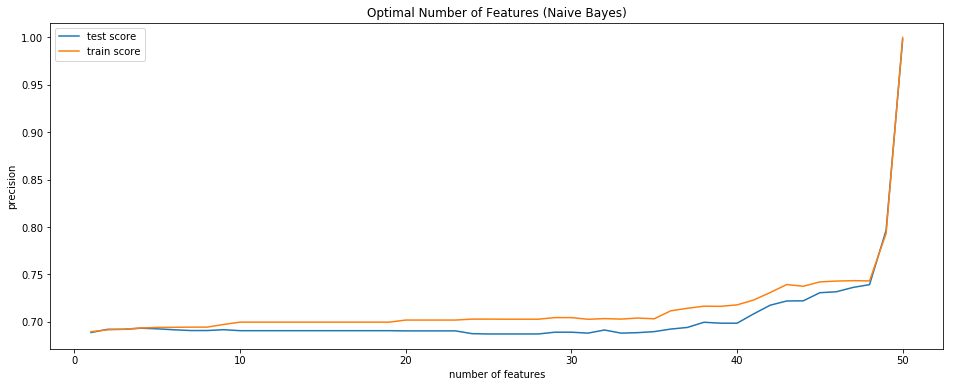

In [96]:
from sklearn .linear_model import LogisticRegression
model=naive_bayes.BernoulliNB()
see_graph(model,X_train,X_test,y_train,y_test)

In [94]:
#LR=LogisticRegression()
#LR.fit()
see_matrix(model,X_train,X_test,y_train,y_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080856,0.011058,0.000199,0.000399,1,{'n_features_to_select': 1},0.611465,0.681529,0.745223,0.713376,...,0.688776,0.044375,42,0.709265,0.691693,0.675719,0.682616,0.688995,0.689658,0.011251
1,0.083197,0.009531,0.000402,0.000803,2,{'n_features_to_select': 2},0.619355,0.681529,0.745223,0.717949,...,0.692160,0.042254,18,0.710400,0.695024,0.675719,0.685897,0.691200,0.691648,0.011402
2,0.085700,0.011710,0.000000,0.000000,3,{'n_features_to_select': 3},0.619355,0.681529,0.745223,0.717949,...,0.692160,0.042254,18,0.710400,0.695024,0.678973,0.685897,0.691200,0.692299,0.010534
3,0.079843,0.006556,0.003539,0.006592,4,{'n_features_to_select': 4},0.619355,0.681529,0.745223,0.717949,...,0.693340,0.042448,15,0.710400,0.695024,0.678973,0.685897,0.697411,0.693541,0.010696
4,0.077026,0.007820,0.003125,0.006250,5,{'n_features_to_select': 5},0.619355,0.681529,0.741935,0.717949,...,0.692681,0.041657,16,0.710400,0.695024,0.681818,0.685897,0.697411,0.694110,0.009956
5,0.076492,0.007121,0.000000,0.000000,6,{'n_features_to_select': 6},0.614379,0.681529,0.741935,0.717949,...,0.691685,0.043421,21,0.711290,0.695024,0.681818,0.685897,0.697411,0.694288,0.010250
6,0.077410,0.007781,0.000197,0.000393,7,{'n_features_to_select': 7},0.614379,0.681529,0.741935,0.717949,...,0.690875,0.043245,23,0.711290,0.695024,0.681818,0.685897,0.698206,0.694447,0.010303
7,0.076466,0.005830,0.003138,0.006276,8,{'n_features_to_select': 8},0.614379,0.681529,0.741935,0.717949,...,0.690875,0.043245,23,0.711290,0.695024,0.681818,0.685897,0.698206,0.694447,0.010303
8,0.073170,0.008527,0.003341,0.006195,9,{'n_features_to_select': 9},0.614379,0.685897,0.741935,0.717949,...,0.691749,0.043091,20,0.711290,0.701639,0.689369,0.685897,0.698206,0.697280,0.009037
9,0.076641,0.007352,0.000000,0.000000,10,{'n_features_to_select': 10},0.609272,0.685897,0.741935,0.717949,...,0.690727,0.044937,25,0.715928,0.701639,0.689369,0.693443,0.698206,0.699717,0.009113
